# Lab 5 - Classification : Naive Bayes and Logistic Regression

**Pre Lab Reading: Naive Bayes' and Logistic Regression - 1.5 hrs**

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Classification through Hypothesis Testing (Known Distribution)

**Here, the distribution of the data is already known.**

**Consider 2 one-dimensional Gaussian distributions : (1) mean -1 and variance 1 (2) mean 1 and variance 1.** <br> **a)Plot the 2 distributions on the same graph(100 data points each)** <br> **b)plot the likelihood function and the ratio of the likelihood function (a normalized function)**<br>**c) For the points x= -1.5, -0.5, 0, 0.5, 1.5, hypothesize what class they belong to.** <br> **d) Plot rough decision regions for this task. **<br>**e)For a Bayesian setup with equal probability of the hypothesis, compute the error in the estimate (as a function of x).**


**(5 points)**

**Estimated Time: 20 mins**

Based on ratio of values for diff x we get these ratio of probabilities:[[20.08553692  2.71828183  1.          0.36787944  0.04978707]]
Based on ratio of values for diff x we get these classes:[[1. 1. 1. 0. 0.]]


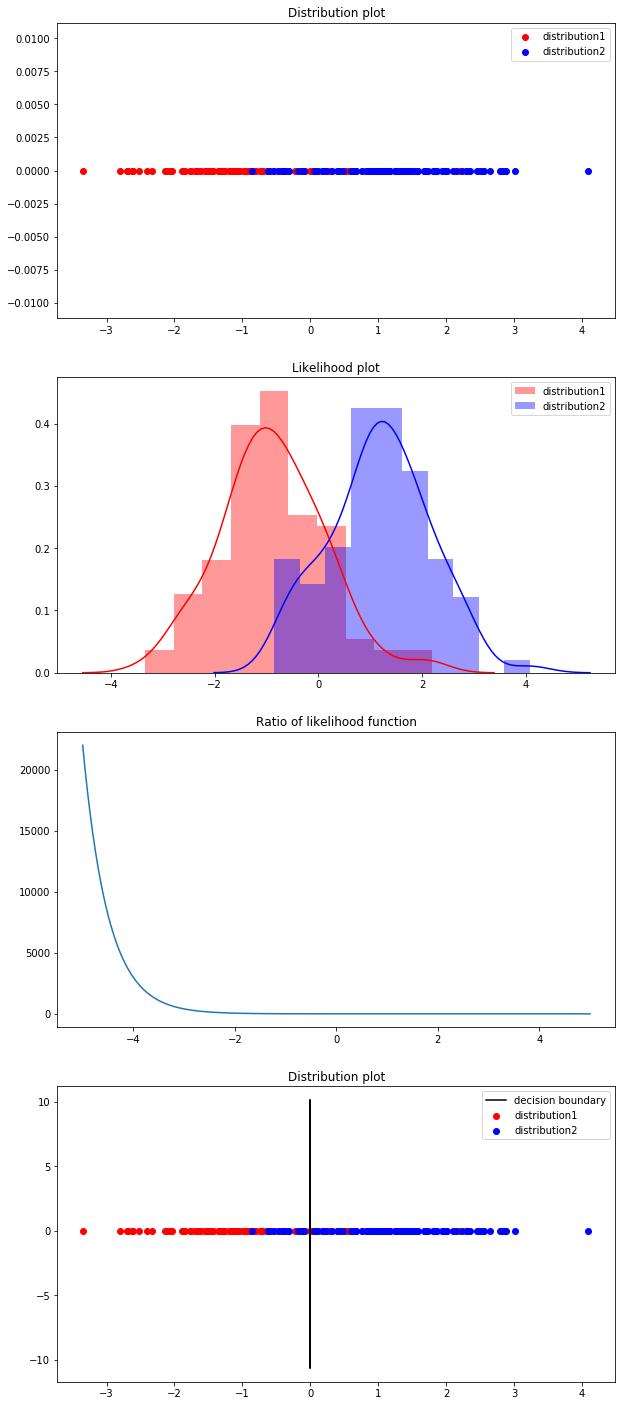

In [2]:
dist1 = 1*np.random.randn(100) - 1
dist2 = 1*np.random.randn(100) + 1

fig =  plt.figure(figsize = [10,25])

#Part A
plt.subplot(4,1,1)
plt.scatter(dist1,np.zeros(100),color='r')
plt.scatter(dist2,np.zeros(100),color='b')
plt.title("Distribution plot")
plt.legend(["distribution1","distribution2"])

#Part B 
plt.subplot(4,1,2)
sns.distplot(dist1,color='r')
sns.distplot(dist2,color='b')
plt.title("Likelihood plot")
plt.legend(["distribution1","distribution2","Ratio of likelihood function"])

plt.subplot(4,1,3)
#Ratio likelihood function
# P(X=x|Y=0)/P(X=x|Y=1) = exp(-(1/2)*((x+1)^2-(x-1)^2))
x = np.linspace(-5,5,1000)
y = np.exp(-0.5*((x+1)**2-(x-1)**2))
plt.title("Ratio of likelihood function")
plt.plot(x,y)



#Part C
x = np.array([-1.5,-0.5,0,0.5,1.5])
#Probabilty ratio
y_ratio =  np.exp(-0.5*((x+1)**2-(x-1)**2))
print("Based on ratio of values for diff x we get these ratio of probabilities:{}".format((np.array([y_ratio]))))
print("Based on ratio of values for diff x we get these classes:{}".format((np.array([y_ratio>=1])*1.0)))

#Part D
#Rough decision boundary is where the ratio is exactly 1 that is (x+1)^2-(x-1)^2 = 0, we get x = 0
plt.subplot(4,1,4)
plt.scatter(dist1,np.zeros(100),color='r')
plt.scatter(dist2,np.zeros(100),color='b')
plt.plot(np.zeros(100),5*np.random.randn(100),color='k')
plt.title("Distribution plot")
plt.legend(["decision boundary","distribution1","distribution2"])
plt.show()


# Data Creation (5 points)

**(a) Load data 'Class0.txt' and 'Class1.txt' from the moodle page. Using the random seed to be 40, split it randomly into 75% train and 25% test datapoints.**

**Estimated time : 10 mins**

In [3]:
data1 = np.loadtxt("./Class0.txt")
data2 = np.loadtxt("./Class1.txt")

np.random.seed(40)
split = 0.75
index_data1=np.random.permutation(len(data1))
index_data2=np.random.permutation(len(data2))


data1_train = data1[index_data1[0:int(split*len(index_data1))]]
data1_test = data1[index_data1[int(split*len(index_data1))::]]

data2_train = data2[index_data2[0:int(split*len(index_data2))]]
data2_test = data2[index_data2[int(split*len(index_data2))::]]

# Classification using Nearest Neighbours (10 points)

**Here, the class to which the new data point belongs to is found using the spatially nearest data points.**

**Use the above train data to create a new train data that has the first 500 points from class 0 and first 600 points from class 1. This will provide the data imbalance required for a thorough understanding of this concept. Use below given test points for this exercise.**  

**a)Take the number of nearest neighbours to be 10,100 and 1000. Find the class to which the given test points belong to. Code using numpy only. <br> b)Visualize the test points with respect to the train set data points. Use matplotlib.<br> c) Plot the decision boundary using scikit learn's inbuilt nearest neighbour classifier function.**

**Test Points: -0.999, 0.898, 0.8, 0.85, 0.115, 0.104, -0.112**

**Estimated Time: 20 mins**


In [4]:
X = np.hstack((data1_train[:500],data2_train[:600]))
Y = np.hstack((np.zeros(len(data1[:500])),np.ones(len(data2[:600]))))

X_test = np.hstack((data1_test,data2_test))
Y_test = np.hstack((np.zeros(len(data1_test)),np.ones(len(data2_test))))

#PartA
test_points = [-0.999, 0.898, 0.8, 0.85, 0.115, 0.104, -0.112]
k_list = [10,100,1000]
#Class they belong to
for k in k_list:
    pr = []
    for test in test_points:
        distances = (X-test)**2
        indices=distances.argsort()[0:k]
        pr.append(((np.mean(Y[indices]))>0.5)*1.0)
    print("For k={},probability:{}".format(k,pr))

For k=10,probability:[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]
For k=100,probability:[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]
For k=1000,probability:[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


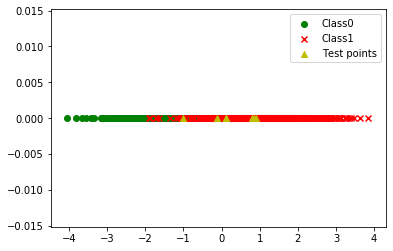

In [5]:
#PartB 
plt.scatter(data1_train[:500],np.zeros(500),marker='o',color='g')
plt.scatter(data2_train[:600],np.zeros(600),marker='x',color='r')
plt.scatter(test_points,np.zeros(7),marker='^',color='y')
plt.legend(["Class0","Class1","Test points"])
plt.show()

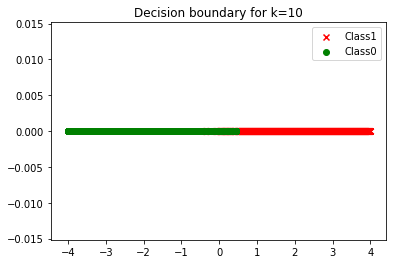

In [6]:
#PartC
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X.reshape(-1, 1), Y)
plot_points = np.linspace(-4,4,10000)
pr = neigh.predict(plot_points.reshape(-1,1))
plt.scatter(plot_points[np.where(pr==1)],np.zeros(len(plot_points[np.where(pr==1)])),marker='x',color='r')
plt.scatter(plot_points[np.where(pr==0)],np.zeros(len(plot_points[np.where(pr==0)])),marker='o',color='g')
plt.title("Decision boundary for k=10")
plt.legend(["Class1","Class0"])
plt.show()


# Naive Bayes (Assumed Distribution) (20 points)

**Here, the distribution of the data is assumed using some prior information. Naive Bayes works on the principle of Bayes' theorem. It assumes a prior fit for the dataset and then classifies the data into two or more classes. The prior can take the form of a Gaussian prior or any other valid probability distribution like multinomial or bernoulli.**

**Use above given train and test data for this exercise.**

**a)Assume a Gaussian prior. Use Bayes rule and Naive Bayes algorithm to find a threshold which will serve as the decision boundary. Points on one side of the boundary belong to class 0 and points on the other side of the boundary belong to class 1. Report the estimated threshold.<br> b) Use the threshold to classify the test points into one of the two classes. Report the accuracy. <br> c) How is Naive Bayes different from Nearest Neighbours(based on training done and inference computation time)?<br> d) Plot the decision region using matplotlib.
Estimated Time: 40 mins**

Naive bayes accuracy is 83.2%


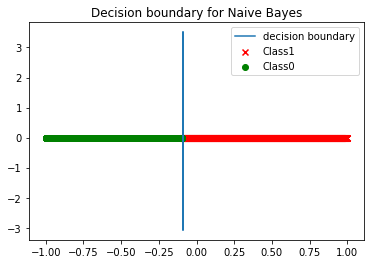

In [7]:
#Code here
#EE15B085/109
#Gaussian parameter estimates of Class 0 
miu0 = np.mean(X[:500])
var0 = np.var(X[:500])
a_0 = 500/(600+500)

miu1 = np.mean(X[500:])
var1 = np.var(X[500:])
a_1 = 1-a_0

#PartB
threshold = -0.0911607783969773
#for data1 test set and data2 test set, for data set1 x<threshold and vice versa for data test2 
accuracy = (np.sum(data1_test<=threshold)+np.sum(data2_test>threshold))/(len(data1_test)+len(data2_test))
print("Naive bayes accuracy is {}%".format(accuracy*100))
#PartD
x = np.linspace(-1,1,5000)
P_x_y0 = np.exp(-0.5*(((x-miu0)**2)/var0))/np.sqrt(2*np.pi*var0)
P_x_y1 = np.exp(-0.5*(((x-miu1)**2)/var1))/np.sqrt(2*np.pi*var1)
P = np.array((((P_x_y1*a_1)/(P_x_y0*a_0+P_x_y1*a_1))>0.5)*1.0)

plt.scatter(x[np.where(P==1)],np.zeros(len(x[np.where(P==1)])),marker='x',color='r')
plt.scatter(x[np.where(P==0)],np.zeros(len(x[np.where(P==0)])),marker='o',color='g')
plt.plot(threshold*np.ones(1000),np.random.randn(1000))
plt.title("Decision boundary for Naive Bayes")
plt.legend(["decision boundary","Class1","Class0"])
plt.show()


 Summarize your findings and results here.  
 Q1) The threshold is x = -0.0912, on equating P(Y=1|x)=0.5 we get this value of threshhold  
 Q2) Naive bayes is O(1) in inference time wheras KNN is O(N) in inference time. Naive bayes training time is also less as we just need to compute mean, variance and P(Y=1|X=x). However training time of KNN is O(1). There is no training required for KNN. Naive bayes uses statistical analysis whereas KNN is based on taking value of its nearest neighbours.

# Logistic Regression (No assumption) (30 points)

**Here, no previous assumption is made about the data's distribution.**

**Estimated Time: 1 hr**

**Use the above given train and test data for this exercise. The y value to which class 0 belongs to can be taken as 0 and the y value to which class 1 belongs to can be taken as 1.**

**(a) Fit a linear regression model to the dataset using sklearn. Report the accuracy. Use the threshold as 0.5 to classify to class 0 or class 1. You will find that linear regression is not apt to solve the problem.**

In [8]:
#Reshuffling train and test data
index_data=np.random.permutation(len(X))
index_data_test=np.random.permutation(len(X_test))
X = X[index_data]
Y = Y[index_data]
X_test = X_test[index_data_test]
Y_test = Y_test[index_data_test]

#Fitting Linear regression model 
lin_mod = LinearRegression().fit(X.reshape(-1, 1),Y)
y_train_pred = lin_mod.predict(X.reshape(-1, 1))
y_test_pred  = lin_mod.predict(X_test.reshape(-1, 1))
#Applying thresholding
y_train_pred=(y_train_pred>=0.5)*1
y_test_pred=(y_test_pred>=0.5)*1

print("Accuracy of train set:{}%".format(100-np.mean(abs(Y-y_train_pred))*100))
print("Accuracy of test set:{}%".format(100-np.mean(abs(Y_test-y_test_pred))*100))      

Accuracy of train set:85.0%
Accuracy of test set:83.2%


**(b) Logistic Regression uses the sigmoid function for binary classification. Plot the sigmoid function for the range x : [-100,100]. This exercise will help you understand the shape of the sigmoid function and show its suitability in binary classification problems.**



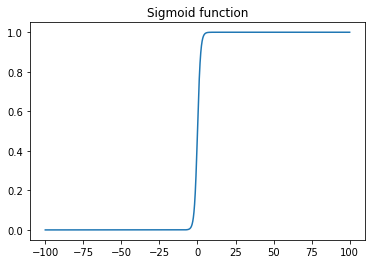

In [9]:
x = np.linspace(-100,100,10000)
y = 1/(1+np.exp(-x))
plt.plot(x,y)
plt.title("Sigmoid function")
plt.show()

**(c) Comment on the nature of the graph (specifically : domain,range,behaviour in extreme inputs). This task will give you further insight on the sigmoid function, which will help you while implementing logistic regression.**

The graph is continous and bounded between 0 and 1. For +inf the output is 1 and for -inf the output is 0. Its range is (-1,1). Its domain ranges from (-inf,+inf). 

**(d) Derive and plot the gradients of the sigmoid function for the same range. This is needed for gradient descent in logistic regression.**

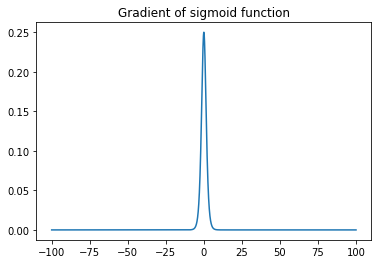

In [10]:
x = np.linspace(-100,100,10000)
y_grad = (np.exp(-x))/(1+np.exp(-x))**2
plt.plot(x,y_grad)
plt.title("Gradient of sigmoid function")
plt.show()

**(e)Again, use the above created train and test set. Implement logistic regression (using only numpy) to predict whether the datapoints belongs to class 0 or 1. Gradient descent also has to be implemented using numpy. Tune the learning rate parameter between 0.001, 0.01, 0.1 and the number of iterations between 50, 100 and 1000 to arrive at a good solution. Use a random initialization of weight and bias.
<br>Estimated time: 1 hr**


In [11]:
# Optional

**(f) Plot the decision boundary.**

In [12]:
# Optional

**(f) What are the advantages of using a Negative Log Likelihood cost function here, as opposed to a least squares cost function in linear regression? (answer should be based on the difference in the tasks and the output functions, convexity of the function).**


Least squares cost function is quite paricular certain types of problems such as regression type problems. Its not usefull in classification problem as here we dont need to match the probability scores exactly. Negative log liklehood function on the the other hand is theroretically backed and is general, that is it can be applied to any type of problems(regression/classification).  
Least squares cost function aims to minimize the squared difference between target and predicted values. On the other hand Negative log likelihood aims to maximize probability of observing data by changing parameter.  
Least squares is convex in nature. Negative log liklelihood may not always be convex in nature, it depends on the pdf of the dataset.

**a)Load LogReg_2d_data.txt and LogReg_2d_labels.txt from moodle. Perform random shuffle and train test split(75:25). Use sklearn to perform logistic regression on the dataset. <br>b)Report the accuracy and F1 score. <br>c)Visualize the decision boundary.**

In [13]:
data = np.loadtxt("./LogReg_2d_data.txt")
labels = np.loadtxt("./LogReg_2d_labels.txt")

#Splitting into test train set
np.random.seed(40)
split = 0.75
index_data=np.random.permutation(len(data))

X_train = data[index_data[0:int(split*len(index_data))]]
X_test = data[index_data[int(split*len(index_data))::]]

y_train = labels[index_data[0:int(split*len(index_data))]]
y_test = labels[index_data[int(split*len(index_data))::]]

#Logistic Regression
log_mod = LogisticRegression().fit(X_train,y_train)
y_train_pred = log_mod.predict(X_train)
y_test_pred  = log_mod.predict(X_test)

print("Accuracy of train set:{}%".format(100-np.mean(abs(y_train-y_train_pred))*100))
print("Accuracy of test set:{}%".format(100-np.mean(abs(y_test-y_test_pred))*100))  

print("F1 score for train set:{}".format(f1_score(y_train, y_train_pred)))
print("F1 score for test set:{}".format(f1_score(y_test, y_test_pred)))

Accuracy of train set:97.33333333333333%
Accuracy of test set:100.0%
F1 score for train set:0.9705882352941176
F1 score for test set:1.0


/home/vishwesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


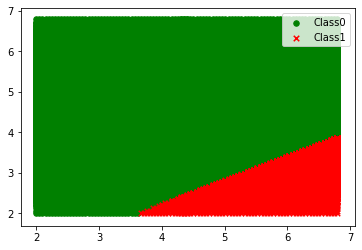

In [27]:
#decision boundary
#Sampling points
X1 = np.linspace(np.min(X_train,axis=0),np.max(X_train,axis=0),50)
X2 = np.linspace(np.min(X_train,axis=1),np.max(X_train,axis=1),50)
#Generating a mesh
x_plot,y_plot = np.meshgrid(X1,X2)
X_1=x_plot.flatten()
X_2 = y_plot.flatten()
X_plot=np.stack((X_1,X_2)).T

Y_plot = log_mod.predict(X_plot)

plt.scatter(X_plot[Y_plot==0,0],X_plot[Y_plot==0,1],color='g',s=30,marker='o')
plt.scatter(X_plot[Y_plot==1,0],X_plot[Y_plot==1,1],color='r',s=30,marker='x')
plt.legend(["Class0","Class1"])
plt.show()

# The End